Korrelationskoeffizient r = 0.014, p-Wert = 0.9392


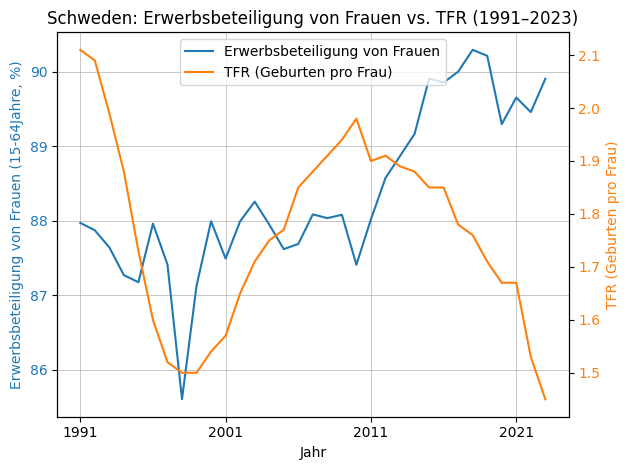

In [19]:
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import os
#import numpy as np
from scipy.stats import pearsonr


# create output folder
os.makedirs("diagram_output", existx_ok=True)

country = "Sweden"

# Read fertility Data
df = pd.read_csv("female_laborforce.csv")
output = pd.read_excel("fertility_rates.xls", sheet_name="Data", index_col=0, skiprows=3)
country_data = output.loc[country]

df_sweden = df[df["Entity"] == "Sweden"] #way for ourworldindata data

ratio_column = "Ratio of female to male labor force participation rate (%) (modeled ILO estimate)"
ratios = df_sweden[ratio_column].tolist()

available_years = sorted(df_sweden["Year"].unique())
years_every_10 = available_years[::10]
sweden_tfr_data = []

for year in available_years:
    sweden_tfr_data.append(country_data[str(year)])

#r = np.corrcoef(ratios, sweden_tfr_data)[0, 1]
#print(f"Korrelationskoeffizient zwischen Female Labor Participation Ratio und TFR in {country}: {r:.4f}")
r, p = pearsonr(ratios, sweden_tfr_data)
print(f"Korrelationskoeffizient r = {r:.3f}, p-Wert = {p:.4f}")


fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel("Jahr")
ax1.set_ylabel("Erwerbsbeteiligung von Frauen (15-64Jahre, %)", color=color)
ax1.plot(available_years, ratios, color=color, label="Erwerbsbeteiligung von Frauen")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # zweite y-Achse
color = 'tab:orange'
ax2.set_ylabel("TFR (Geburten pro Frau)", color=color)
ax2.plot(available_years, sweden_tfr_data, color=color, label="TFR (Geburten pro Frau)")
ax2.tick_params(axis='y', labelcolor=color)

plt.title(f"Schweden: Erwerbsbeteiligung von Frauen vs. TFR ({available_years[0]}–{available_years[-1]})")
plt.xticks(years_every_10, rotation=45)
fig.tight_layout()

ax1.grid(True, which='both', axis='both', linestyle='-', linewidth=0.5)
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper center")

plt.savefig(f"diagram_output/{country}_tfr_vs_laborforce_dualaxis.png", dpi=1200)
plt.show()

Korrelationskoeffizient r = -0.477, p-Wert = 0.0001


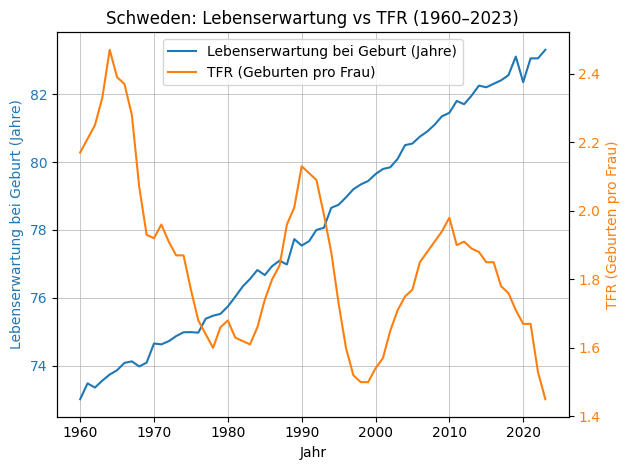

In [16]:
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import os
from scipy.stats import pearsonr

# Ordner für Diagramm speichern
os.makedirs("diagram_output", exist_ok=True)

# Read fertility and life expectancy data
df = pd.read_excel("life_expectancy.xls", sheet_name="Data", index_col=0, skiprows=3)
output = pd.read_excel("fertility_rates.xls", sheet_name="Data", index_col=0, skiprows=3)
sweden_data = df.loc["Sweden"]

years = sweden_data.index[3:]  # skip first 3 columns
available_years = sorted(years.unique())

sweden_tfr_data = []
life_expectancy_data = []
valid_years = []

for year in available_years:
    year_str = str(year)
    try:
        tfr = float(output.loc["Sweden", year_str])
        le = float(sweden_data[year_str])
        if pd.notna(tfr) and pd.notna(le):
            sweden_tfr_data.append(tfr)
            life_expectancy_data.append(le)
            valid_years.append(int(year_str))  # echte Jahre für x-Achse
    except (KeyError, ValueError):
        continue

# Korrelationskoeffizient berechnen
r, p = pearsonr(sweden_tfr_data, life_expectancy_data)
print(f"Korrelationskoeffizient r = {r:.3f}, p-Wert = {p:.4f}")

# Diagramm erstellen (Zwei Y-Achsen)
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel("Jahr")
ax1.set_ylabel("Lebenserwartung bei Geburt (Jahre)", color=color)
ax1.plot(valid_years, life_expectancy_data, color=color, label="Lebenserwartung bei Geburt (Jahre)")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel("TFR (Geburten pro Frau)", color=color)
ax2.plot(valid_years, sweden_tfr_data, color=color, label="TFR (Geburten pro Frau)")
ax2.tick_params(axis='y', labelcolor=color)

plt.title(f"Schweden: Lebenserwartung vs TFR ({valid_years[0]}–{valid_years[-1]})")
plt.xticks(valid_years[::10], rotation=45)  # alle 10 Jahre
fig.tight_layout()

# Legende zusammenführen
ax1.grid(True, which='both', axis='both', linestyle='-', linewidth=0.5)
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper center")

# Diagramm speichern
plt.savefig("diagram_output/sweden_life_expectancy_vs_tfr_dualaxis.png", dpi=1200)
plt.show()


Sweden


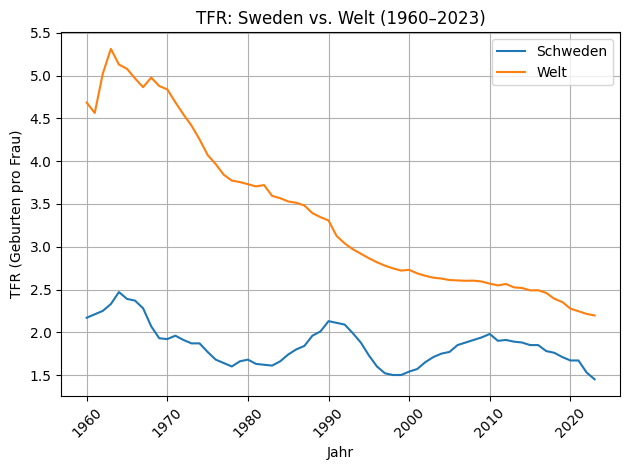

In [17]:
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import os

# create output folder
os.makedirs("diagram_output", exist_ok=True)

country = "Sweden"
# Read Data
output = pd.read_excel("fertility_rates.xls", sheet_name="Data", index_col=0, skiprows=3)
country_data = output.loc[country]
world_data = output.loc["World"]

# X-Values (years)
years = country_data.index[3:]  # erste 3 Spalten überspringen

# Y-Values
sweden_rates = country_data[3:].values
world_rates = world_data[3:].values

# Create diagram
plt.plot(years, sweden_rates, label="Schweden")
plt.plot(years, world_rates, label="Welt")

# Configure diagram
plt.xticks(years[::10], rotation=45)
plt.title(f"TFR: {country} vs. Welt (1960–2023)")
plt.xlabel("Jahr")
plt.ylabel("TFR (Geburten pro Frau)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save diagram
plt.savefig(f"diagram_output/{country}_vs_world_fertility_rate.png", dpi=1200)

# Show diagram
plt.show()